In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from statsmodels.formula.api import ols
from scipy.stats import f, chi2

%matplotlib inline

In [29]:
import seaborn as sns
sns.set(color_codes=True)

# MOOC Econometrics
## Training Exercise 6.1

In [6]:
ts1 = pd.read_csv('TrainExer61.txt', sep='\t')
ts1.head()

,EPSX,EPSY,X,Y
0,-2.447232,-1.421835,0.000000,0.000000
1,-1.540471,-0.632123,-1.540471,-0.632123
2,1.284912,-1.997182,-0.255559,-2.629304
3,-0.854495,0.174588,-1.110054,-2.454717
4,0.959860,-2.087111,-0.150194,-4.541828


The datafile `TrainExer61` contains values of four series of length 250. 

- Two of these series are uncorrelated white noise series denoted by $ε_{xt}$ and $ε_{yt}$, where both variables are NID(0, 1), that is, normally and independently distributed standard normal random variables. 
- The other two series are so-called random walks constructed from these two white noise series by $x_t = x_{t-1} + ε_{xt}$ and $y_t = y_{t-1} + ε_{yt}$, with starting values $x_1 = 0$ and $y_1 = 0$
- As $ε_{xt}$ and $ε_{ys}$ are independent for all values of $t$ and $s$, the same holds true for all values of $x_t$ and $y_s$.

The purpose
of this exercise is to experience that, nonetheless, the regression of $y$ on $x$ indicates a highly significant relation
between $y$ and $x$ if evaluated by standard regression tools. This kind of result is called _spurious regression_ and is
caused by the trending nature of the variables $x$ and $y$. The lesson we learn is that standard regression tools are
not applicable if the variables contain trends similar to those of the random walks considered here.

**(a)** Use dataset `TrainExer61` to make the following graphs: the time series plot of $x_t$ against time $t$, the time series plot of $y_t$ against time $t$, and the scatter plot of $y_t$ against $x_t$ . What conclusion could you draw from these three graphs?

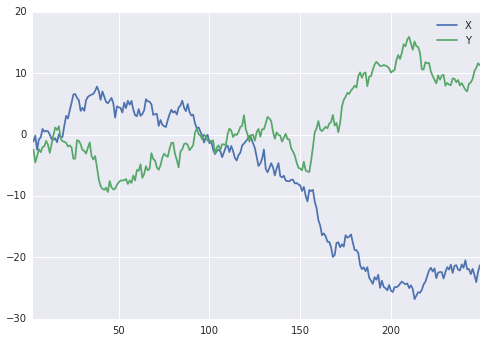

In [48]:
ts1.X.plot()
ts1.Y.plot()
plt.legend()

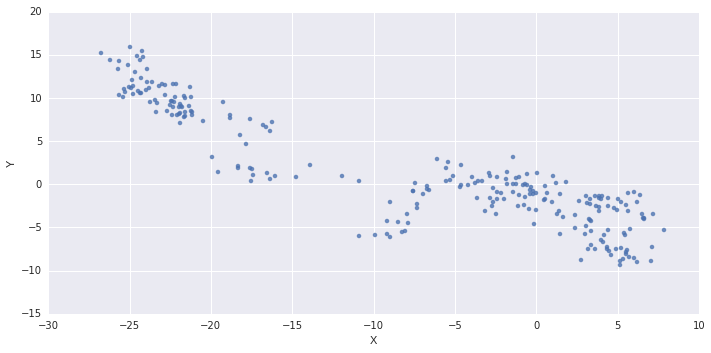

In [41]:
sns.lmplot(x='X', y='Y', data=ts1, fit_reg=False, size=5, aspect=2)

Looks like there's negative strong correlation

**(b)** To check that the series $ε_{xt}$ and $ε_{yt}$ are uncorrelated, regress $ε_{yt}$ on a constant and $ε_{xt}$. Report the $t$-value and $p$-value of the slope coefficient.

In [17]:
model1b_eps = sm.OLS(ts1.EPSY, sm.add_constant(ts1.EPSX)).fit()
print 'R^2 = %0.4f' % model1b_eps.rsquared

pd.DataFrame({'$p$-values': model1b_eps.pvalues,
              '$t$-values': model1b_eps.tvalues })

R^2 = 0.0070


,$p$-values,$t$-values
const,0.628830,0.483976
EPSX,0.188803,-1.317750


**(c)** Extend the analysis of part **(b)** by regressing $ε_{yt}$ on a constant, $ε_{xt}$, and three lagged values of $ε_{yt}$ and of $ε_{xt}$.

- Perform the $F$-test for the joint insignificance of the seven parameters of $ε_{xt}$ and the three lags of $ε_{xt}$ and $ε_{yt}$.
- Report the degrees of freedom of the $F$-test and the numerical outcome of this test, and draw your conclusion.
- Note: The relevant 5% critical value is 2.0.

In [19]:
ts1['EPSY_lag1'] = ts1.EPSY.shift(1)
ts1['EPSY_lag2'] = ts1.EPSY.shift(2)
ts1['EPSY_lag3'] = ts1.EPSY.shift(3)

ts1['EPSX_lag1'] = ts1.EPSX.shift(1)
ts1['EPSX_lag2'] = ts1.EPSX.shift(2)
ts1['EPSX_lag3'] = ts1.EPSX.shift(3)

In [24]:
ts1.dropna(inplace=1)

In [26]:
X = sm.add_constant(ts1.ix[:, ['EPSX', 'EPSY_lag1', 'EPSY_lag2', 'EPSY_lag3', 'EPSX_lag1', 'EPSX_lag2', 'EPSX_lag3']])
model1c_eps = sm.OLS(ts1.EPSY, X).fit()

In [27]:
print 'R^2 = %0.4f' % model1c_eps.rsquared
print 'F = %0.4f (p-val = %0.4f)' % (model1c_eps.fvalue, model1c_eps.f_pvalue)

pd.DataFrame({'$p$-values': model1c_eps.pvalues,
              '$t$-values': model1c_eps.tvalues })

R^2 = 0.0157
F = 0.5457 (p-val = 0.7992)


,$p$-values,$t$-values
const,0.485668,0.698301
EPSX,0.161316,-1.405011
EPSY_lag1,0.699458,0.386517
EPSY_lag2,0.807084,-0.244460
EPSY_lag3,0.463791,-0.733798
EPSX_lag1,0.776719,0.283918
EPSX_lag2,0.392337,-0.856940
EPSX_lag3,0.890141,0.138274


**(d)** Regress $y$ on a constant and $x$. Report the $t$-value and $p$-value of the slope coefficient. What conclusion would you be tempted to draw if you did not know how the data were generated?

In [28]:
model1d = sm.OLS(ts1.Y, sm.add_constant(ts1.X)).fit()
print 'R^2 = %0.4f' % model1d.rsquared

pd.DataFrame({'$p$-values': model1d.pvalues,
              '$t$-values': model1d.tvalues })

R^2 = 0.8150


,$p$-values,$t$-values
const,6.404131e-25,-11.549131
X,9.450006e-92,-32.854602


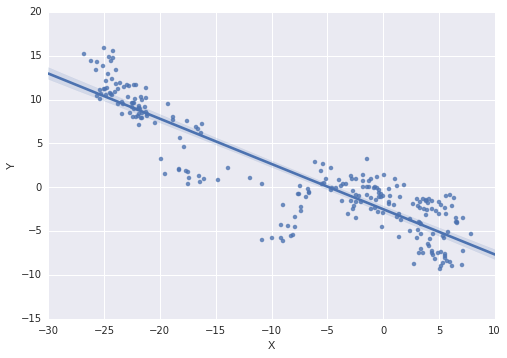

In [42]:
sns.regplot(x="X", y="Y", data=ts1)
plt.show()

**(e)** Let $e_t$ be the residuals of the regression of part **(d)**. Regress $e_t$ on a constant and the one-period lagged residual $e_{t-1}$. What standard assumption of regression is clearly violated for the regression in part **(d)**?

In [43]:
resid = pd.DataFrame({'e': model1d.resid, 'e_1': model1d.resid.shift(1)})
resid.dropna(inplace=1)

model1e = sm.OLS(resid.e, sm.add_constant(resid.e_1)).fit()
print 'R^2 = %0.4f' % model1e.rsquared

pd.DataFrame({'$p$-values': model1e.pvalues,
              '$t$-values': model1e.tvalues })

R^2 = 0.8566


,$p$-values,$t$-values
const,8.501561e-01,0.18912
e_1,7.187723e-105,38.17074


Residuals are very strongly correlated

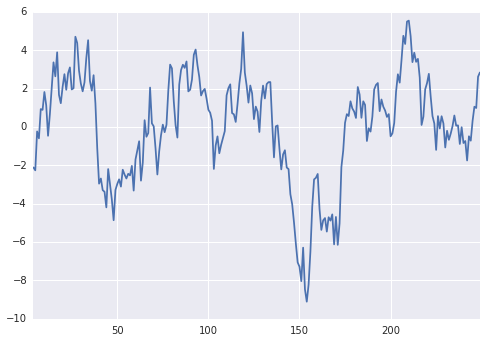

In [47]:
resid.e.plot()

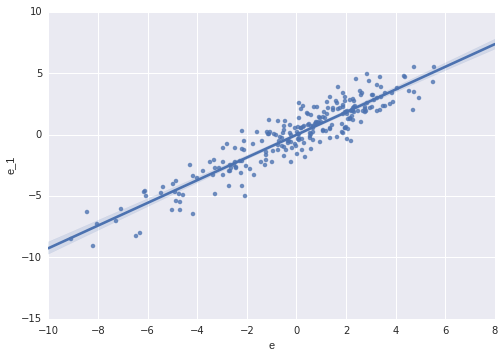

In [44]:
sns.regplot(x="e", y="e_1", data=resid)
plt.show()

it violates the assumption that error terms should not be correlated, i.e. $\text{cov}(\varepsilon_i, \varepsilon_j) = 0 \ \forall i \ne j$

## Training Exercise 6.4

In [50]:
airlines = pd.read_csv('TrainExer64.txt', sep='\t')
airlines.head()

,YEAR,RPK1,RPK2,X1,X2,DX1,DX2
0,1975,13.548751,11.092779,2.606294,2.406294,NaN,NaN
1,1976,13.413939,11.092779,2.596294,2.406294,-0.01,0.00
2,1977,13.413939,11.204263,2.596294,2.416294,0.00,0.01
3,1978,13.684918,11.204263,2.616294,2.416294,0.02,0.00
4,1979,14.243410,11.204263,2.656294,2.416294,0.04,0.00


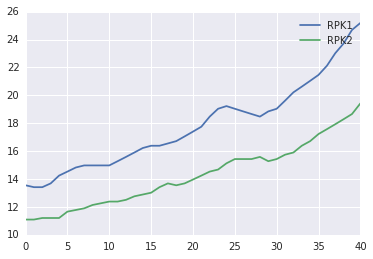

In [64]:
airlines.RPK1.plot()
airlines.RPK2.plot()
plt.legend()
plt.show()

- $X_1 = \log \text{RPK}_1$, $DX_{1t} = X_{1t} - X_{1,t-1}$
- $X_2 = \log \text{RPK}_2$, $DX_{2t} = X_{2t} - X_{2,t-1}$

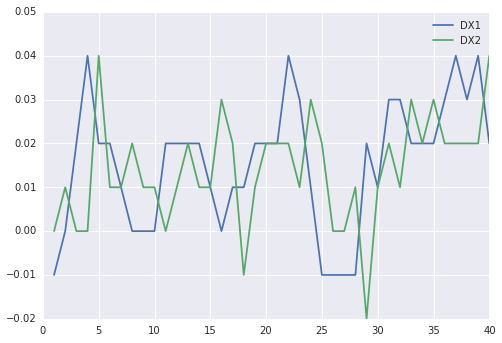

In [54]:
airlines.DX1.plot()
airlines.DX2.plot()
plt.legend()
plt.show()

The datafile `TrainExer64` contains the Revenue Passenger Kilometer (RPK) data of two airline companies that were
considered in Lecture 6.4. In this exercise, you are asked to perform a set of regressions to check the main results
presented in the lecture. For ease of notation, we denote the $\log$ of RPK by $X_1$ for company 1 and by $X_2$ for
company 2. The first differences $∆X_1$ and $∆X_2$ are the yearly growth rates of RPK.

**(a)** Perform two $F$-tests, one for the Granger causality of $∆X_2$ for $∆X_1$ and the other for the Granger causality of $∆X_1$ for $∆X_2$. Include a constant and two lags of both variables in the test equations. Report the degrees of freedom and the numerical values of the two $F$-tests, and draw your conclusion. The relevant 5% critical value
is 3.3.

Model for $X_1$:

$$\Delta X_{1t} = \alpha + \beta_1 \, \Delta X_{1,t-1} + \beta_2 \, \Delta X_{1,t-2} + \gamma_1 \, \Delta X_{2,t-1} + \gamma_2 \, \Delta X_{2,t-2}$$

Hypothesis for this model: $H_0$: $\Delta X_2$ is not Granger-causal for $\Delta X_1$, i.e. $\gamma_1 = \gamma_2 = 0$

In [101]:
airlines['X1_lag1'] = airlines.X1.shift(1)
airlines['X1_lag2'] = airlines.X1.shift(2)
airlines['X2_lag1'] = airlines.X2.shift(1)
airlines['X2_lag2'] = airlines.X2.shift(2)

airlines['DX1_lag1'] = airlines.DX1.shift(1)
airlines['DX1_lag2'] = airlines.DX1.shift(2)
airlines['DX2_lag1'] = airlines.DX2.shift(1)
airlines['DX2_lag2'] = airlines.DX2.shift(2)

airlines_cleaned = airlines.dropna()

In [259]:
def summary(model, names):
    return pd.DataFrame(
             {'coeff': names,
              'value': model.params, 
              '$t$-value': model.tvalues,
              'SE': model.bse,
              '$p$-value': model.pvalues},
             columns=['coeff', 'value', 'SE', '$t$-value', '$p$-value'])

In [260]:
model_a1 = ols('DX1 ~ DX1_lag1 + DX1_lag2 + DX2_lag1 + DX2_lag2', data=airlines_cleaned).fit()
summary(model_a1, ['$\\alpha$', '$\\beta_1$', '$\\beta_2$', '$\gamma_1$', '$\gamma_2$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.006644,0.003602,1.844762,0.074064
DX1_lag1,$\beta_1$,0.871633,0.175794,4.958270,0.000021
DX1_lag2,$\beta_2$,-0.422589,0.209027,-2.021695,0.051378
DX2_lag1,$\gamma_1$,0.345883,0.198947,1.738565,0.091435
DX2_lag2,$\gamma_2$,-0.194779,0.153613,-1.267987,0.213676


Coefficients $\gamma_1$ and $\gamma_2$ do not seem signigicant. Let's do a joint $F$-Test

In [103]:
model_a1_null = ols('DX1 ~ DX1_lag1 + DX1_lag2', data=airlines_cleaned).fit()
a1_R2_null = model_a1_null.rsquared

In [104]:
g = 2
n = len(airlines_cleaned)
k = 5
print g, n, k
F = ((model_a1.rsquared - a1_R2_null) / g) / ((1 - model_a1.rsquared) / (n - k))
F

2 38 5


2.1498457182282347

$n=38$ - even though we started with $n=40$, two observations are lost because we use lag-2 model

In [105]:
R = [[0, 0, 0, 1, 0], 
     [0, 0, 0, 0, 1]]

f_test = model_a1.f_test(R)
print 'F = %0.4f (p-value = %0.4f)' % (f_test.fvalue[0][0], f_test.pvalue)

F = 2.1498 (p-value = 0.1325)


In [106]:
model_a1.f_test('DX2_lag1 = DX2_lag2 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 2.14984572]]), p=0.132538961328, df_denom=33, df_num=2>

Expected: ![](https://habrastorage.org/files/aa0/e97/fa9/aa0e97fa9b4c41bb8707ad2ac94c13b3.png)

In [261]:
model_a2 = ols('DX2 ~ DX1_lag1 + DX1_lag2 + DX2_lag1 + DX2_lag2', data=airlines_cleaned).fit()
summary(model_a2, ['$\\alpha$', '$\\beta_1$', '$\\beta_2$', '$\gamma_1$', '$\gamma_2$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.008188,0.002867,2.855962,0.007367
DX1_lag1,$\beta_1$,0.180135,0.139929,1.287331,0.206935
DX1_lag2,$\beta_2$,0.611831,0.166383,3.677254,0.000832
DX2_lag1,$\gamma_1$,-0.286987,0.158359,-1.812255,0.079055
DX2_lag2,$\gamma_2$,-0.128824,0.122274,-1.053569,0.299734


In [108]:
model_a1.f_test('DX1_lag1 = DX1_lag2 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 14.23500072]]), p=3.48768154598e-05, df_denom=33, df_num=2>

So for the second model, $F$-test is significant, while for the first one it's not. 
Which means that $\Delta X_2$ is Granger-causal to $\Delta X_1$, but no the other way around

**(b)**

**(i)** Perform the Augmented Dickey-Fuller (ADF) test for $X_1$. In the ADF test equation, include (among
others) a constant $α$, a deterministic trend term $βt$, and a single lag of $∆X_1$. Report the coefficient
of $X_{1,t-1}$ and its standard error and $t$-value, and draw your conclusion.

$X_1$ and $X_2$ have trends - so we need to include a trend term as well

for **(i)** we estimate parameters of the following regression:

$$\Delta X_{1,t} = \alpha + \beta\, t + \rho \, X_{1,t-1} + \gamma \, \Delta X_{1,t-1}$$

In [262]:
airlines_cleaned = pd.DataFrame(airlines_cleaned)
airlines_cleaned['time'] = range(0, len(airlines_cleaned))

In [263]:
model_b1 = ols('DX1 ~ time + X1_lag1 + DX1_lag1', data=airlines_cleaned).fit()
summary(model_b1, ['$\\alpha$', '$\\beta$', '$\\rho$', '$\gamma$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.483953,0.174037,2.780740,0.008779
time,$\beta$,0.002589,0.000925,2.798365,0.008400
X1_lag1,$\rho$,-0.183907,0.066887,-2.749518,0.009489
DX1_lag1,$\gamma$,0.771839,0.139986,5.513700,0.000004


Critical value of the ADF test is -3.5. Because $t_\rho = -2.74 > -3.5$, we conclude that $X_1$ is not stationary

**(ii)** Perform a similar ADF test for $X_2$.
Note that the 5% critical value differs from the usual one, as explained in the lecture.

In [264]:
model_b1 = ols('DX2 ~ time + X2_lag1 + DX2_lag1', data=airlines_cleaned).fit()
summary(model_b1, ['$\\alpha$', '$\\beta$', '$\\rho$', '$\gamma$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.393432,0.308547,1.275111,0.210915
time,$\beta$,0.002364,0.001687,1.401242,0.170204
X2_lag1,$\rho$,-0.160601,0.128576,-1.249077,0.220168
DX2_lag1,$\gamma$,0.202742,0.191476,1.058837,0.297139


Same conclusion for $X_2$ - it's not stationary

**(c)** Perform the two-step Engle-Granger test for cointegration of the time series $X_1$ and $X_2$. 

- Check that step1 gives $X_{2,t} = 0.01 + 0.92\, X_{1,t}$
- The second-step regression is of the type $e_t = α + ρ\, e_{t-1} + β \, ∆e_{t-1} + ω_t$, where $e_t$ are the residuals of step 1. 

Further, report the regression equation of step 2, perform the test, and draw your conclusion.
Note that the 5% critical value differs from the usual one, as explained in the lecture.

In [265]:
model_c_1 = ols('X2 ~ X1', data=airlines).fit()
summary(model_c_1, ['$\\alpha$', '$\\beta$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.011586,0.050053,0.23148,8.181525e-01
X1,$\beta$,0.919247,0.017441,52.70656,7.269006e-38


Now let's test stationarity of $e_t$ by ADF, model

$$\Delta e_t = \alpha + \rho\, e_{t-1} + \beta \, \Delta e_{t-1}$$

In [266]:
e = model_c_1.resid
e_1 = e.shift(1)
de = e - e_1
de_1 = de.shift(1)

resid_3 = pd.DataFrame({'e': e, 'e_1': e_1, 'de': de, 'de_1': de_1}).dropna()
model_c_2 = ols('de ~ e_1 + de_1', data=resid_3).fit()
summary(model_c_2, ['$\\alpha$', '$\rho$', '$\\beta$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,-0.000090,0.002369,-0.037860,0.970008
e_1,$\rho$,-0.495936,0.141510,-3.504600,0.001243
de_1,$\beta$,0.303936,0.166356,1.827025,0.075996


$t_{\rho} = -3.50$, and the critical value for co-integration test without the trend term is -3.4. Because $t_\rho < -3.4$, we reject $H_0$ that the residuals obtained in the 1st step are non-stationary. 

So that $X_1$ and $X_2$ are co-integrated

**(d)** Finally, estimate an error correction model (ECM) for $X_1$ and also one for $X_2$. 

- In each ECM, include a constant term, a single own lagged term, and the error correction term $X_{2,t-1} - 0.92\, X_{1,t-1}$ obtained from the first step
of Engle-Granger in part **(c)**. 
- Provide an interpretation of the results in terms of mechanisms that correct for
disequilibrium.

For $X_1$, ECM is:

$$\Delta X_{1t} = \alpha + \beta_1\, \Delta X_{1,t-1} + \beta_2\, (X_{2,t-1} - 0.92\, X_{1,t-1}) + e_t$$

In [267]:
airlines_cleaned['equilibrium'] = airlines_cleaned.X2_lag1 - 0.92 * airlines_cleaned.X1_lag1

model_d1 = ols('DX1 ~ DX1_lag1 + equilibrium', data=airlines_cleaned).fit()
summary(model_d1, ['$\\alpha$', '$\\beta_1$', '$\\beta_2$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,-0.004902,0.003509,-1.397179,1.711553e-01
DX1_lag1,$\beta_1$,1.055174,0.146848,7.185471,2.205232e-08
equilibrium,$\beta_2$,0.476456,0.109223,4.362225,1.081756e-04


- if $X_{2,t-1}$ is too large, as compared to the equilibrium, then  $X_{2,t-1} - 0.92\, X_{1,t-1} > 0$ and $\Delta X_{1,t-1} >0$, and hence $X_{1t}$ will become larger. reducing the gap from equilibrium

For $X_2$, ECM is:

$$\Delta X_{2t} = \alpha + \beta_1\, \Delta X_{2,t-1} + \beta_2\, (X_{2,t-1} - 0.92\, X_{1,t-1}) + e_t$$

In [149]:
model_d2 = ols('DX2 ~ DX2_lag1 + equilibrium', data=airlines_cleaned).fit()
summary(model_d2, ['$\\alpha$', '$\\beta_1$', '$\\beta_2$'])

,coeff,value,$t$-value,SE,$p$-value
Intercept,$\alpha$,0.017932,7.178496,0.002498,2.251154e-08
DX2_lag1,$\beta_1$,0.056211,0.434326,0.129421,6.667176e-01
equilibrium,$\beta_2$,-0.443373,-5.671210,0.078180,2.094886e-06


if $X_{2,t-1}$ is large compared to the equilibrium s.t. $X_{2,t-1} - 0.92\, X_{1,t-1} > 0$,then $\Delta X_{1,t-1} <0$, and $X_{2t}$ becomes smaller - reducing the gap from equilibrium

"ERRORS" - deviations from the equilibrium

## Training Exercise 6.5

The datafile `TrainExer65` contains yearly data on industrial production (`IP`) in the USA and on the Composite
Leading Index (`CLI`), both in logarithms. 

The example in Lecture 6.5 considered monthly data, and now we consider
yearly data, both for the two log-series and for their first differences that correspond to the yearly growth rates. The
main question of interest is whether past values of the growth rate in `CLI` have predictive power for future growth
rates of `IP`. We denote the yearly growth rates by $\text{GIP} = ∆ \log \text{IP}$ and $\text{GCLI} = ∆ \log \text{CLI}$.

Note: In all questions, use 1960-2002 as estimation and test sample, and use 2003-2007 as hold-out forecast
evaluation sample. That is, the data for 2003-2007 are nowhere used to estimate models or to perform tests, and
these data are only used for forecast comparison

In [222]:
gr = pd.read_csv('TrainExer65.txt', sep='\t')
gr['time'] = range(0, len(gr))
gr.head()

,YEAR,LOGIP,LOGCLI,GIP,GCLI,time
0,1960,3.207248,3.437208,-0.063612,-0.015949,0
1,1961,3.325288,3.538057,0.118039,0.100849,1
2,1962,3.359298,3.566712,0.034011,0.028655,2
3,1963,3.425988,3.621671,0.066689,0.054959,3
4,1964,3.511217,3.683867,0.085229,0.062196,4


In [223]:
train = gr.YEAR < 2003

**(a)** Make time series plots of $\log \text{IP}$ and $\log \text{CLI}$, and also of the yearly growth rates `GIP` and `GCLI`. What
conclusions do you draw from these plots?

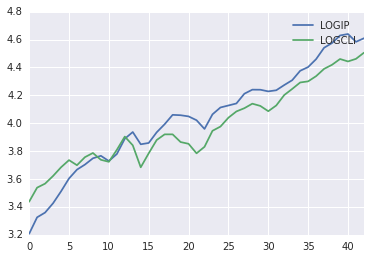

In [224]:
gr[train].LOGIP.plot()
gr[train].LOGCLI.plot()
plt.legend()

Both series have a trend, perhaps they are co-integrated. `LOGIP` should be possible to predict from `LOGCLI`

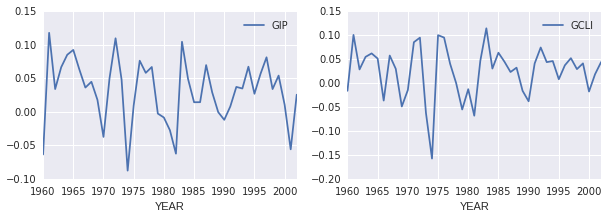

In [225]:
plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 2, 1)
gr[train].plot(x='YEAR', y='GIP', ax=ax)

ax = plt.subplot(1, 2, 2)
gr[train].plot(x='YEAR', y='GCLI', ax=ax)

They seem stationary. Note that there are heavy fluctuations in the 70s.

**(b)**

Test for stationatiy

**(i)** Perform the Augmented Dickey-Fuller (ADF) test for $\log \text{IP}$. In the ADF test equation, include (among
others) a constant ($α$), a deterministic trend term ($β\, t$), and two lags of $\text{GIP} = ∆ \log \text{IP}$. Report the
coefficient of $\log \text{IP}_{t-1}$ and its standard error and $t$-value, and draw your conclusion.

In [226]:
model_5_b1 = ols('GIP ~ time + LOGIP.shift(1) + GIP.shift(1) + GIP.shift(2)', data=gr[train]).fit()
summary(model_5_b1, names=[r'$\alpha$', r'$\gamma$', r'$\rho$', r'$\beta_1$', r'$\beta_2$'])

,coeff,value,$t$-value,SE,$p$-value
Intercept,$\alpha$,0.974669,2.827441,0.344718,0.007616
time,$\gamma$,0.007403,2.496663,0.002965,0.017251
LOGIP.shift(1),$\rho$,-0.275214,-2.706379,0.101691,0.010333
GIP.shift(1),$\beta_1$,0.257488,1.826091,0.141005,0.076140
GIP.shift(2),$\beta_2$,-0.095722,-0.657600,0.145563,0.514978


Our $t_\rho = -0.27$, critical $p$-value for $t_\rho$ is -3.5 (we have a constant and a trend) - so reject $H_0$ of stationarity of $\log \text {IP}$

**(ii)** Perform a similar ADF test for $\log \text{CLI}$.

In [227]:
model_5_b2 = ols('GCLI ~ time + LOGCLI.shift(1) + GCLI.shift(1) + GCLI.shift(2)', data=gr[train]).fit()
summary(model_5_b2, names=[r'$\alpha$', r'$\gamma$', r'$\rho$', r'$\beta_1$', r'$\beta_2$'])

,coeff,value,$t$-value,SE,$p$-value
Intercept,$\alpha$,0.860860,1.934830,0.444928,0.060899
time,$\gamma$,0.005401,1.933398,0.002794,0.061081
LOGCLI.shift(1),$\rho$,-0.240513,-1.885040,0.127591,0.067516
GCLI.shift(1),$\beta_1$,0.302639,2.041502,0.148243,0.048582
GCLI.shift(2),$\beta_2$,-0.284596,-1.818625,0.156490,0.077296


Our $t_\rho = -0.24$, critical $p$-value for $t_\rho$ is -3.5 (we have a constant and a trend) - so reject $H_0$ of stationarity of $\log \text {CLI}$

**(c)** Perform the two-step Engle-Granger test for cointegration of the time series $\log \text{IP}$ and $\log \text{CLI}$. 

In [228]:
model_5c_1 = ols('LOGIP ~ LOGCLI', data=gr[train]).fit()
summary(model_5c_1, ['$\\alpha$', '$\\beta$'])

,coeff,value,$t$-value,SE,$p$-value
Intercept,$\alpha$,-1.020689,-5.004268,0.203964,1.106317e-05
LOGCLI,$\beta$,1.270532,24.839894,0.051149,2.479501e-26


The second-step regression is of the type $\Delta e_t = α + \gamma\, t + ρ\, e_{t-1} + β_1\, \Delta e_{t-1} + β_2\, \Delta e_{t-2} + ω_t$, where $e_t$ are the residuals of step 1.

In [250]:
e = model_5c_1.resid

resid_53 = pd.DataFrame({'e': e, 'de': e - e.shift(1), 'time': np.arange(0, len(e))})
model_5c_2 = ols('de ~ time + e.shift(1) + de.shift(1) + de.shift(2)', data=resid_53).fit()
summary(model_5c_2, ['$\\alpha$', r'$\gamma$', '$\rho$', '$\\beta_1$', r'$\beta_2$'])

,coeff,value,$t$-value,SE,$p$-value
Intercept,$\alpha$,0.024026,1.316123,0.018255,0.196688
time,$\gamma$,-0.000888,-1.218637,0.000728,0.231132
e.shift(1),$\rho$,-0.177861,-1.757417,0.101206,0.087592
de.shift(1),$\beta_1$,0.142809,0.920374,0.155164,0.363678
de.shift(2),$\beta_2$,-0.318637,-2.008137,0.158673,0.052395


What is your conclusion?

$t_\rho = -1.75$, but it's more than the critical value $-3.8$, so we don't reject $H_0$ of stationarity of $e_t$, so $\log \text{GIP}$ and $\log \text{CLI}$ are not co-integrated

**(d)** Perform two $F$-tests, 

- one for the Granger causality of `GIP` for `GCLI` and 
- the other for the Granger causality of `GCLI` for `GIP`. 
- Include a constant and two lags of both variables in the test equations. 
- Report the degrees of freedom and the numerical values of the two $F$-tests, and draw your conclusion. 
- The relevant 5% critical value is 3.3.

model 1: `GIP` vs `GCLI`

In [253]:
model_5d1 = ols('GIP ~ GIP.shift(1) + GIP.shift(2) + GCLI.shift(1) + GCLI.shift(2)', data=gr[train]).fit()
summary(model_5_b1, names=['$\\alpha$', '$\\beta_1$', '$\\beta_2$', '$\gamma_1$', '$\gamma_2$'])

,coeff,value,$t$-value,SE,$p$-value
Intercept,$\alpha$,0.974669,2.827441,0.344718,0.007616
time,$\beta_1$,0.007403,2.496663,0.002965,0.017251
LOGIP.shift(1),$\beta_2$,-0.275214,-2.706379,0.101691,0.010333
GIP.shift(1),$\gamma_1$,0.257488,1.826091,0.141005,0.076140
GIP.shift(2),$\gamma_2$,-0.095722,-0.657600,0.145563,0.514978


In [254]:
model_5d1.f_test('GCLI.shift(1) = GCLI.shift(2) = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 11.74707996]]), p=0.000118278813026, df_denom=36, df_num=2>

$F$-test reports that $\gamma_1$ and $\gamma_2$ are jointly significant, which means that `GCLI` is Granger-causal to `GIP`

model 2: `GCLI` vs `GIP`

In [255]:
model_5d2 = ols('GCLI ~ GCLI.shift(1) + GCLI.shift(2) + GIP.shift(1) + GIP.shift(2)', data=gr[train]).fit()
summary(model_5_b2, names=['$\\alpha$', '$\\beta_1$', '$\\beta_2$', '$\gamma_1$', '$\gamma_2$'])

,coeff,value,$t$-value,SE,$p$-value
Intercept,$\alpha$,0.860860,1.934830,0.444928,0.060899
time,$\beta_1$,0.005401,1.933398,0.002794,0.061081
LOGCLI.shift(1),$\beta_2$,-0.240513,-1.885040,0.127591,0.067516
GCLI.shift(1),$\gamma_1$,0.302639,2.041502,0.148243,0.048582
GCLI.shift(2),$\gamma_2$,-0.284596,-1.818625,0.156490,0.077296


In [256]:
model_5d2.f_test('GIP.shift(1) + GIP.shift(2) = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 3.0336646]]), p=0.0900934042904, df_denom=36, df_num=1>

$\gamma_1$ and $\gamma_2$ are not jointly significant, so we cannot say that `GIP` Granger-causes `GCLI`

**(e)** 

- Show that the coefficients of both lags in an AR(2) model for `GIP` are insignificant. 
- Show also that even the slope coefficient in the AR(1) model $\text{GIP}_t = α + β\, \text{GIP}_{t-1} + ε_t$ is insignificant. 
- Make two forecasts for GIP for the five years from 2003-2007, one from the AR(1) model and another from the simple model $\text{GIP}_t = α + ε_t$.

In [268]:
model_5e_ar2 = ols('GIP ~ GIP.shift(1) + GIP.shift(2)', data=gr[train]).fit()
summary(model_5e_ar2, names=['$\\alpha$', '$\\beta_1$', '$\\beta_2$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.030865,0.009350,3.300970,0.002102
GIP.shift(1),$\beta_1$,0.247181,0.147126,1.680069,0.101148
GIP.shift(2),$\beta_2$,-0.235277,0.145927,-1.612294,0.115174


In `AR(2)`,  $p$-values for both $\beta_1$ and $\beta_2$ are higher than 0.05, so both coefficients are insignificant

In [270]:
model_5e_ar1 = ols('GIP ~ GIP.shift(1)', data=gr[train]).fit()
summary(model_5e_ar1, names=['$\\alpha$', '$\\beta$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.029864,0.008506,3.511060,0.001122
GIP.shift(1),$\beta$,0.112290,0.149278,0.752217,0.456325


for `AR(1)`, $\beta$ is also insignificant

In [273]:
model_5e_simple = sm.OLS(gr[train].GIP, np.ones_like(gr[train].GIP)).fit()
summary(model_5e_simple, names=['$\\alpha$'])

,coeff,value,SE,$t$-value,$p$-value
const,$\alpha$,0.031118,0.007267,4.282009,0.000105


In [275]:
simple_prediction = gr[train].GIP.mean()

In [287]:
X = sm.add_constant(gr.GIP.shift(1))[~train]
ar1_pred = model_5e_ar1.predict(X, transform=False)

simple_pred = gr[train].GIP.mean() * np.ones_like(ar1_pred)

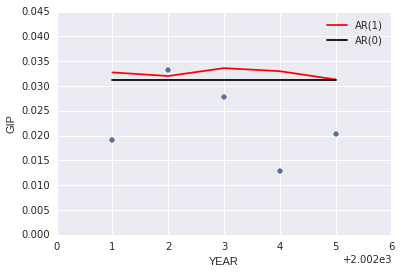

In [301]:
gr[~train].plot(y='GIP', x='YEAR', kind='scatter')
plt.plot(gr[~train].YEAR, ar1_pred, color='red', label='AR(1)')
plt.plot(gr[~train].YEAR, simple_pred, color='black', label='AR(0)')

plt.legend()

**(f)** 

- Estimate the `ADL(2,2)` model $\text{GIP}_t = α + β_1\, \text{GIP}_{t-1} + β_2\, \text{GIP}_{t-2} + γ_1\, \text{GCLI}_{t-1} + γ_2\, \text{GCLI}_{t-2} + ε_t$, and 
- show by means of an $F$-test that the null hypothesis that $β_1 = β_2 = γ_2 = 0$ is not rejected. 
- Then estimate the `ADL(0,1)` model $\text{GIP}_t = α + γ\, \text{GCLI}_{t-1} + ε_t$ and use this model to forecast `GIP` for the five years from 2003-2007

In [307]:
model_5f_adl22= ols('GIP ~ GIP.shift(1) + GIP.shift(2) + GCLI.shift(1) + GCLI.shift(2)', data=gr[train]).fit()
summary(model_5f_adl22, names=[r'$\alpha$', r'$\beta$', r'$\beta_2$', r'$\gamma_1$', r'$\gamma_2$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.016418,0.008493,1.933201,0.061106
GIP.shift(1),$\beta$,-0.219916,0.189292,-1.161778,0.252971
GIP.shift(2),$\beta_2$,0.251701,0.184187,1.366554,0.180240
GCLI.shift(1),$\gamma_1$,0.719794,0.149960,4.799895,0.000028
GCLI.shift(2),$\gamma_2$,-0.170238,0.166179,-1.024422,0.312471


In [308]:
model_5f_adl22.f_test('GIP.shift(1) = GIP.shift(2) = GCLI.shift(2) = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 1.52043874]]), p=0.225780705091, df_denom=36, df_num=3>

Can't reject $H_0$, so we'll use a simpler model  $\text{GIP}_t = α + γ\, \text{GCLI}_{t-1} + ε_t$ 

In [321]:
model_5f_adl11= ols('GIP ~ GCLI.shift(1)', data=gr[train]).fit()
summary(model_5f_adl11, names=[r'$\alpha$', r'$\gamma$'])

,coeff,value,SE,$t$-value,$p$-value
Intercept,$\alpha$,0.022034,0.006472,3.404419,0.001520
GCLI.shift(1),$\gamma$,0.472407,0.109405,4.317972,0.000101


In [322]:
X = sm.add_constant(gr.GCLI.shift(1))[~train]
adl11_pred = model_5f_adl11.predict(X, transform=False)

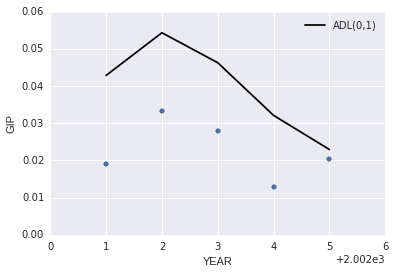

In [324]:
gr[~train].plot(y='GIP', x='YEAR', kind='scatter')
plt.plot(gr[~train].YEAR, adl11_pred, color='black', label='ADL(0,1)')

plt.legend()

**(g)** Compare the three series of forecasts of parts **(e)** and **(f)** by computing their values of 

- the root mean squared error (RMSE), 
- mean absolute error (MAE), and 
- the sum of the forecast errors (SUM). 

Check that it seems quite difficult to forecast the IP growth rates for 2003-2007 from models estimated from 1960-2002. 

Can you
think of possible reasons why this is the case?

In [326]:
def rmse(real, predicted):
    mse = np.mean((real - predicted) ** 2)
    return np.sqrt(mse)

def mae(real, predicted):
    return np.abs(real - predicted).mean()

def sum_fe(real, predicted):
    return np.sum(real - predicted)

def all_metrics(real, predicted):
    return rmse(real, predicted), mae(real, predicted), sum_fe(real, predicted)

In [328]:
real = gr[~train].GIP

df = pd.DataFrame({'AR(0)': all_metrics(real, simple_pred),
                   'AR(1)': all_metrics(real, ar1_pred), 
                   'ADL(0,1)': all_metrics(real, adl11_pred)},
                  columns=['AR(0)', 'AR(1)', 'ADL(0,1)'])
df.index = ['RMSE', 'MAE', 'SUM']
df

,AR(0),AR(1),"ADL(0,1)"
RMSE,0.011020,0.012199,0.018548
MAE,0.009282,0.010337,0.016992
SUM,-0.042075,-0.049140,-0.084962


Compare to 

![](https://habrastorage.org/files/ac1/40e/c30/ac140ec30c57428ebc868865d36a11a2.png)

`AR(0)` is the best